<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M7_AI1_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PADAWAN*: 


##JOSE ARMANDO ALVARADO RUIZ

# **Tema 1. SUPPORT VECTOR MACHINE**

**Entrega: MNIST y Fashion-MNIST**


# **Descripción de la tarea**

###Contexto

En esta práctica realizaremos clasificación de imágenes con Support Vector Machine. Para ello, utilizaremos dos datasets: MNIST y Fashion-MNIST.

MNIST 

- Es un dataset de dígitos de MNIST (Modified-NIST, del Instituto Nacional de Estándares y Tecnología de EEUU).

- Consta de 60.000 imágenes de entrenamiento y 10.000 de prueba. El tamaño de la imagen es de 28 x 28 píxeles. Cada imagen está etiquetada de 0 a 9 en función del dígito representado. 

- Se utiliza como banco de pruebas para clasificar imágenes con algoritmos de Machine Learning. 

Fashion-MNIST 

- Es un dataset de imágenes de artículos de moda de la empresa Zalando. Fue concebido para sustituir a MNIST porque requiere modelos de clasificación más complejos. 

- Mantiene las características de MNIST en cuanto a número de imágenes (60.000 de entrenamiento y 10.000 de prueba), tamaño de las imágenes (28 x 28 píxeles) y número de clases (10). 

- Se diferencia en el contenido de las imágenes: 10 tipos de artículos de moda, en lugar de los 10 dígitos. 

El objetivo es comparar el resultado (accuracy) en función del dataset y el tipo de kernel SVM.

Teniendo en cuenta la información anterior, te pedimos realizar las tareas siguientes: 

Dataset 

- Cargar ambos datasets desde tensorflow.
- Preprocesado: convertir las imágenes en vectores unidimensionales. 

Modelos de SVM: 
- Cargar el modelo de clasificador SVM de sklearn. 
- Utilizar dos tipos de kernel: Lineal y Gausiano.
- Entrenar con 20.000 imágenes.
- Probar con el dataset de prueba completo (10.000 imágenes).  

Consideraciones: 

Para acortar el tiempo de entrenamiento con el kernel gaussiano, se aconseja 

- Dejar el valor de gamma por defecto (“scale”).
- Dejar el valor de probability por defecto (“False”).

### **Importación librerias**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randInt

import warnings
from time import time
import datetime
import random

%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None


# Función para medir los modelos en hh:mm:ss

def segundos_a_minutos(segundos):
    horas = int(segundos / 60 / 60)
    segundos -= horas*60*60
    minutos = int(segundos/60)
    segundos -= minutos*60
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}"

# Lectura del dataset. 

Lectura del Dataset MNIST utilizando Keras:

In [3]:
mnist = keras.datasets.mnist
(train_digits, train_labeldigit), (test_digits, test_labeldigit) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Tamaño del dataset MNIST:

In [4]:
(train_digits.shape, train_labeldigit.shape), (test_digits.shape, test_labeldigit.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

Lectura del Dataset FASHION_MNIST utilizando Keras:

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_fashion, train_labelfashion), (test_fashion, test_labelfashion) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Tamaño dekl dataset FASHION-MNIST

In [6]:
(train_fashion.shape, train_labelfashion.shape), (test_fashion.shape, test_labelfashion.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

Podemos ver que los datos en ambos Dataset son del tipo numpy.narray de tres dimensionesen el caso de los datos de train ya que son imagenes de 28x28 pixeles.

Veamos cuales son las imagenes asociadas a cada uno de nuestros dataset:

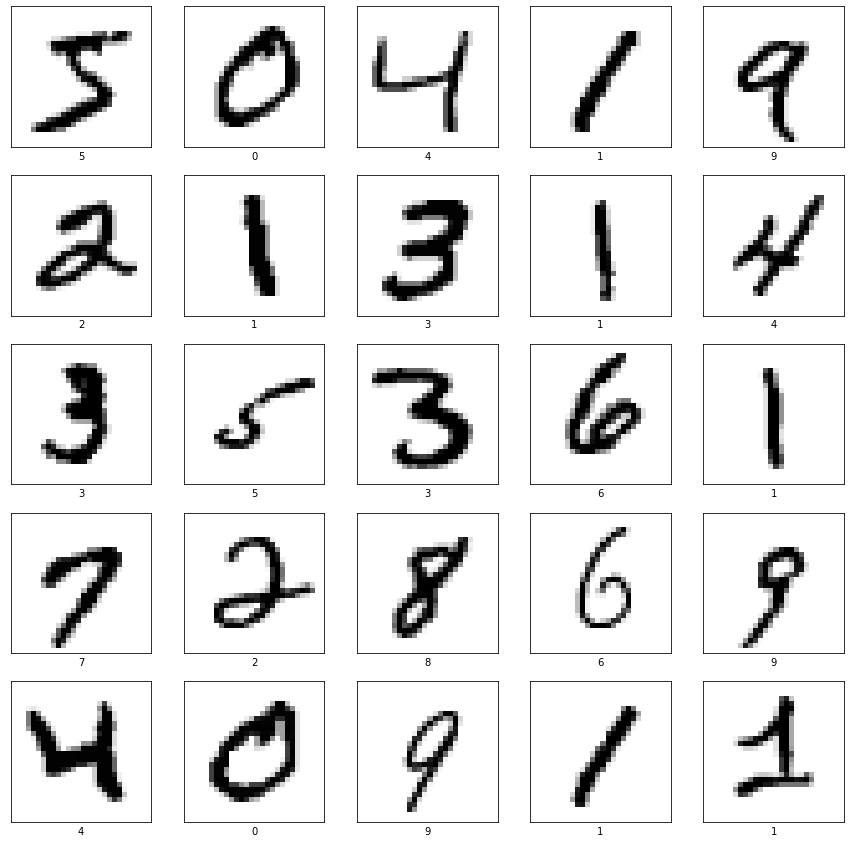

In [7]:
# Dataset MNIST
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_digits[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(train_labeldigit[i])
plt.show()

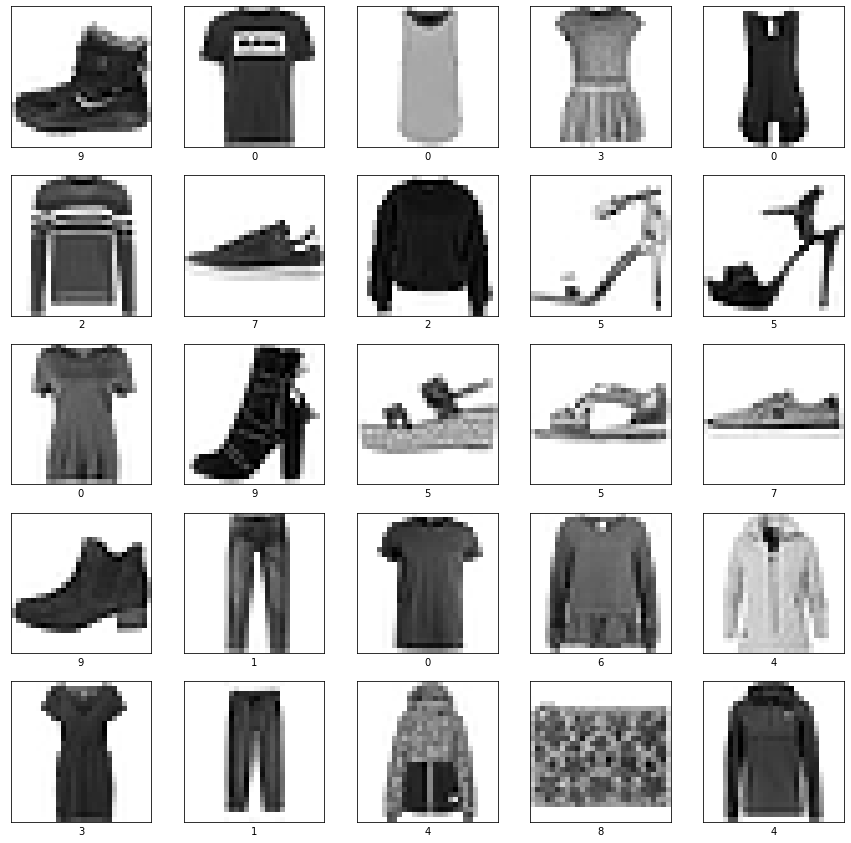

In [ ]:
# Dataset Fashion-MNIST

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_fashion[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(train_labelfashion[i])
plt.show()

# Aplicar las conversiones necesarias para pasar de 3d-array a 2d-array (con “reshape”).

In [8]:
# Para dataset MNIST
train_digits = train_digits.reshape(60000, -1)
test_digits = test_digits.reshape(10000, -1)

In [9]:
# Para dataset FASHION_MNIST
train_fashion = train_fashion.reshape(60000, -1)
test_fashion = test_fashion.reshape(10000, -1)

In [10]:
# Corroboramos la dimensiones de los dataset:

(train_digits.shape, test_digits.shape), (train_fashion.shape, test_fashion.shape)

(((60000, 784), (10000, 784)), ((60000, 784), (10000, 784)))

Ahora vamos a seleccionar de los 60 mil registros de train, solo 20 mil para entrenar nuestro futuros modelos:

In [11]:
# Seleccionamos los 20000 primeros registros de cada array de train
train_digits = train_digits[:20000]
train_labeldigit = train_labeldigit[:20000]

train_fashion = train_fashion[:20000]
train_labelfashion = train_labelfashion[:20000]

In [12]:
# Normalizacion de 0-255 a 0-1

train_digits = train_digits.astype('float32')/255.0
test_digits = test_digits.astype('float32')/255.0

train_fashion = train_fashion.astype('float32')/255.0
test_fashion = test_fashion.astype('float32')/255.0

<AxesSubplot:ylabel='count'>

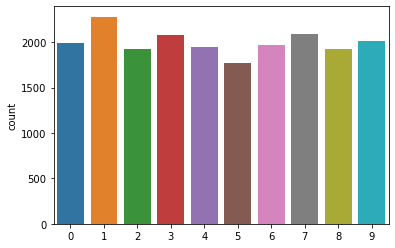

In [ ]:
# Plot distribution labeldigit Dataset Mnist
sns.countplot(train_labeldigit[1:])

<AxesSubplot:ylabel='count'>

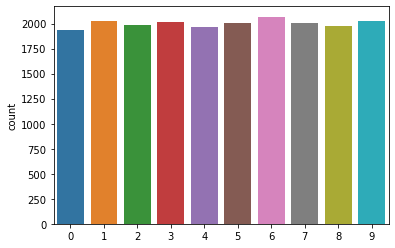

In [ ]:
# Plot distribution labelfashion Dataset Fashion_Mnist
sns.countplot(train_labelfashion[1:])

In [13]:
# Comprobamos tamaño de nuestros array de train
train_digits.shape, train_labeldigit.shape, train_fashion.shape, train_labelfashion.shape

((20000, 784), (20000,), (20000, 784), (20000,))

Verificamos cuales son los labels de cada uno de los dataset:

In [ ]:
digit = np.unique(train_labeldigit)
digit

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
fashion = np.unique(train_labelfashion)
fashion

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

En ambos dataset, nuestra variable objetivo o target es un numero de 0 a 9, por lo que en cada dataset tenemos 10 variables respuestas. 

# Modelos SVM

# DataSet MNIST:

### SVC con parámetros por defecto:

En primer lugar, vamos a modelar el algoritmo SVM con los parametros por defecto para ver su comportamiento. Recordemos que segun la documentación de scikit-learn, los parametros por defectos de SVC son:

*class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)



In [ ]:
timeIni = time()
modelo1_svc_default = SVC()
modelo1_svc_default.fit(train_digits, train_labeldigit)
timeEnd = time()

timeDiff_modelo1_default = segundos_a_minutos(int(timeEnd - timeIni))

In [ ]:
y_pred_default1 = modelo1_svc_default.predict(test_digits)

In [ ]:
print("Modelo SVC con parámetros por defecto en dataset MNIST:")
print("Tiempo necesario para su cómputo: ", timeDiff_modelo1_default)
print("ACCURACY: ", accuracy_score(test_labeldigit,y_pred_default1))


print("Reporte de Clasificación:\n\n", classification_report(test_labeldigit,y_pred_default1))


Modelo SVC con parámetros por defecto en dataset MNIST:
Tiempo necesario para su cómputo:  00:00:31
ACCURACY:  0.9695
Reporte de Clasificación:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labeldigit,y_pred_default1))

Matriz de confusion:

 [[ 969    0    1    0    0    3    4    1    2    0]
 [   0 1124    3    2    0    2    1    1    2    0]
 [   5    0 1001    1    4    0    2   10    9    0]
 [   0    0    5  982    0    5    0    9    7    2]
 [   1    0    3    0  955    0    6    1    2   14]
 [   5    1    0   14    1  856    6    1    6    2]
 [   8    3    0    1    2    5  937    0    2    0]
 [   0   11   16    7    2    0    0  980    0   12]
 [   4    0    3   12    4    8    2    4  935    2]
 [   5    6    2    8   17    1    0    8    6  956]]


### SVC con diferentes Kernel y utilizando GridSearchCV Dataset MNIST

Ahora vamos a utilizar GridSearchCV para buscar una mejor aproximación utilizando Cross Validation de 10 veces y dos kernel diferentes Linear (Lineal) y Rbf (Gausiano). Además para hacer más rapido el procesado se utilizará gamma y probability por defecto (scale y false)  

In [ ]:
# Definimos los parametros asociados a nuestro algoritmo SVC (KERNEL = LINEAR) :
param_grid_linear = { 'kernel': ['linear'],
                      'C': [1, 10, 100, 1000],
                      'gamma': ['scale'],
                      'probability': [False]
                    }

In [ ]:
# Kernel : Linear
timeIni = time()
model_digit_lineal = GridSearchCV(SVC(), 
                                  param_grid = param_grid_linear, 
                                  cv=5, 
                                  verbose=1, 
                                  scoring="accuracy")

model_digit_lineal.fit(train_digits, train_labeldigit)
timeEnd = time()
timeDiff_model1 = segundos_a_minutos(int(timeEnd - timeIni))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
y_pred_lineal_digits = model_digit_lineal.predict(test_digits)

In [ ]:
print("Modelo SVC con parámetros Kernel = LINEAR (Lineal):")
print("La mejor parametrización para la SVM (en el conjunto de training) es: ", model_digit_lineal.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff_model1)
print("ACCURACY: ", model_digit_lineal.best_score_)

print("Reporte de Clasificación:\n\n", classification_report(test_labeldigit,y_pred_lineal_digits))

Modelo SVC con parámetros Kernel = LINEAR (Lineal):
La mejor parametrización para la SVM (en el conjunto de training) es:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear', 'probability': False}
Tiempo necesario para su cómputo:  00:07:15
ACCURACY:  0.9207000000000001
Reporte de Clasificación:

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.91      0.92      0.92      1032
           3       0.88      0.91      0.90      1010
           4       0.92      0.95      0.93       982
           5       0.90      0.87      0.89       892
           6       0.95      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.92      0.87      0.89       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
we

In [ ]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labeldigit,y_pred_lineal_digits))

Matriz de confusion:

 [[ 951    0    4    3    0   11    8    1    1    1]
 [   0 1118    3    3    1    2    1    1    6    0]
 [   8    7  952   16    4    3    9   12   17    4]
 [   4    4   21  924    1   20    0   11   20    5]
 [   0    0    8    2  931    1    9    6    2   23]
 [  14    5    6   41    7  780   10    2   24    3]
 [   9    3   14    0    7   13  911    1    0    0]
 [   2    9   22   13   17    0    0  943    0   22]
 [   9    7   16   31   10   33    8    6  846    8]
 [  11    8    2   14   35    4    1   26    7  901]]


In [ ]:
# Analisis de Cross-Validation del modelo con Kernel = Linear

cv_results_digit_lineal = pd.DataFrame(model_digit_lineal.cv_results_)
cv_results_digit_lineal

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_probability,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,15.224806,0.423333,5.380787,0.176066,1,scale,linear,False,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear',...",0.92875,0.92575,0.92050,0.90825,0.92025,0.9207,0.007008,1
1,15.589812,0.491661,5.048716,0.118061,10,scale,linear,False,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'...",0.91825,0.91500,0.90900,0.89875,0.90900,0.9100,0.006658,2
2,15.572903,0.275073,5.119291,0.211072,100,scale,linear,False,"{'C': 100, 'gamma': 'scale', 'kernel': 'linear...",0.91800,0.91475,0.90925,0.89925,0.90675,0.9096,0.006518,3
3,15.487234,0.467930,5.106510,0.088913,1000,scale,linear,False,"{'C': 1000, 'gamma': 'scale', 'kernel': 'linea...",0.91800,0.91475,0.90925,0.89925,0.90675,0.9096,0.006518,3


In [ ]:
# Definimos los parametros asociados a nuestro algoritmo SVC (KERNEL = RBF) :
param_grid_rbf = {'kernel': ['rbf'],
                  'C': [1, 10, 100, 1000],
                  'gamma': ['scale'],
                  'probability': [False]
                  }

In [ ]:
# Kernel : Gausiano

timeIni = time()
model_digit_rbf = GridSearchCV(SVC(), 
                               param_grid = param_grid_rbf, 
                               cv=5, 
                               verbose=1, 
                               scoring="accuracy")

model_digit_rbf.fit(train_digits, train_labeldigit)
timeEnd = time()
timeDiff_model2 = segundos_a_minutos(int(timeEnd - timeIni))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
y_pred_rbf_digits = model_digit_rbf.predict(test_digits)

In [ ]:
print("Modelo SVC con parámetros Kernel = RBF (Gausiano):")
print("Mejores Parametros SVM (en el conjunto de training) es: ", model_digit_rbf.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff_model2)
print("ACCURACY: ", model_digit_rbf.best_score_)

print("Reporte de Clasificación:\n\n", classification_report(test_labeldigit,y_pred_rbf_digits))

Modelo SVC con parámetros Kernel = RBF (Gausiano):
Mejores Parametros SVM (en el conjunto de training) es:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'probability': False}
Tiempo necesario para su cómputo:  00:11:47
ACCURACY:  0.9737
Reporte de Clasificación:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.

In [ ]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labeldigit,y_pred_rbf_digits))

Matriz de confusion:

 [[ 970    0    2    1    0    2    2    1    2    0]
 [   0 1128    4    0    0    1    2    0    0    0]
 [   4    1 1009    0    2    0    2    9    5    0]
 [   0    0    2  990    0    5    0    6    5    2]
 [   1    0    2    0  960    0    4    1    2   12]
 [   3    1    0   12    2  861    7    1    3    2]
 [   6    3    1    0    2    5  939    0    2    0]
 [   0   12   10    3    3    0    0  990    1    9]
 [   3    1    2    5    3    5    1    3  949    2]
 [   3    2    1    7   12    2    0   10    1  971]]


In [ ]:
# Analisis de Cross-Validation del modelo con Kernel = RBF

cv_results_digit_rbf = pd.DataFrame(model_digit_rbf.cv_results_)
cv_results_digit_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_probability,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,23.239792,0.395687,11.794618,0.191532,1,scale,rbf,False,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'p...",0.9715,0.96800,0.9660,0.96425,0.97200,0.96835,0.003023,4
1,21.393863,0.752260,12.140201,0.670137,10,scale,rbf,False,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', '...",0.9755,0.97550,0.9730,0.97125,0.97325,0.97370,0.001623,1
2,21.508702,0.328451,12.028674,0.862010,100,scale,rbf,False,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf', ...",0.9750,0.97525,0.9725,0.97150,0.97350,0.97355,0.001435,2
3,21.725034,0.398003,11.642810,0.682910,1000,scale,rbf,False,"{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf',...",0.9750,0.97525,0.9725,0.97150,0.97350,0.97355,0.001435,2


## Conclusión Dataset MNIST

Hemos realizado tres modelos para este dataset, el primero utilizando los valores por defecto del modelo SVC, donde utiliza el kernel Gausiano (RBF), un C=1, 
gamma = Scale y donde el modelo tuve un Accuracy de 96.95%, bastante bueno y bastante rápido en su ejecución.

Luego ya hemos utilizado GridSearchCV para validar nuestro modelo con Cross Validation (por tema de ejecución se utilizo solo CV = 5). Acá utlizamos dos Kernel 
tanto el Linear (Lineal) como el RBF (Gausiano) y con 4 posibles valores de C = [1,10,100,1000]. Así nuestro mejor modelo fue utilizando el Kernel Gausiano con un 
C=10, mejorando en más de 1% el accuracy del modelo por defecto llegando a 97,37%, que consideró igual el mismo kernel (RBF) pero con un C=1. Recordemos que la implementación en Scikit-learn del parametro C es inversamente al valor teorico de C. O sea esto significa que un valor de C=1 o C=10 no nos quiere indicar que menos se penalizan los errores, sino que es un valor que penaliza bastante los errores.

-----------------------------------------------------------------------------------------

# DataSet Fashion_MNIST

### SVC con parámetros por defecto

In [ ]:
timeIni = time()
modelo2_svc_default = SVC()
modelo2_svc_default.fit(train_fashion, train_labelfashion)
timeEnd = time()

timeDiff_modelo2_default = segundos_a_minutos(int(timeEnd - timeIni))

In [ ]:
y_pred_default2 = modelo2_svc_default.predict(test_fashion)

In [ ]:
print("Modelo SVC con parámetros por defecto en dataset FASHION_MNIST:")
print("Tiempo necesario para su cómputo: ", timeDiff_modelo2_default)
print("ACCURACY: ", accuracy_score(test_labelfashion,y_pred_default2))

print("Reporte de Clasificación:\n\n", classification_report(test_labelfashion,y_pred_default2))

Modelo SVC con parámetros por defecto en dataset FASHION_MNIST:
Tiempo necesario para su cómputo:  00:00:36
ACCURACY:  0.8639
Reporte de Clasificación:

               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.77      0.79      0.78      1000
           3       0.84      0.89      0.86      1000
           4       0.78      0.79      0.79      1000
           5       0.95      0.94      0.94      1000
           6       0.67      0.62      0.65      1000
           7       0.92      0.93      0.92      1000
           8       0.96      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labelfashion,y_pred_default2))

Matriz de confusion:

 [[810   0  14  53   3   2 107   0  11   0]
 [  3 955   5  30   3   0   3   0   1   0]
 [ 14   1 790  11 113   0  67   0   4   0]
 [ 23   5  12 887  29   0  41   0   3   0]
 [  0   0  93  33 793   0  77   0   4   0]
 [  0   0   0   1   0 942   0  40   1  16]
 [134   1 112  36  77   0 624   0  16   0]
 [  0   0   0   0   0  31   0 927   0  42]
 [  2   1   1   6   2   4  12   5 967   0]
 [  0   0   0   0   0  15   0  40   1 944]]


### SVC con diferentes Kernel y utilizando GridSearchCV Dataset FASHION_MNIST

Utilizamos los mismos parametros tanto para el kernel Linear como Rbf (se utiliza mismas variables param_grid).

In [ ]:
# Kernel : Linear

timeIni = time()
model_fashion_lineal = GridSearchCV(SVC(), 
                                    param_grid = param_grid_linear, 
                                    cv=5, 
                                    verbose=1, 
                                    scoring="accuracy")

model_fashion_lineal.fit(train_fashion, train_labelfashion)
timeEnd = time()
timeDiff_model3 = segundos_a_minutos(int(timeEnd - timeIni))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
y_pred_lineal_fashion = model_fashion_lineal.predict(test_fashion)

In [ ]:
print("Modelo SVC con parámetros Kernel = LINEAR (Lineal):")
print("La mejor parametrización para la SVM (en el conjunto de training) es: ", model_fashion_lineal.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff_model3)
print("ACCURACY: ", model_fashion_lineal.best_score_)

print("Reporte de Clasificación:\n\n", classification_report(test_labelfashion,y_pred_lineal_fashion))

Modelo SVC con parámetros Kernel = LINEAR (Lineal):
La mejor parametrización para la SVM (en el conjunto de training) es:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear', 'probability': False}
Tiempo necesario para su cómputo:  04:16:14
ACCURACY:  0.8353999999999999
Reporte de Clasificación:

               precision    recall  f1-score   support

           0       0.75      0.82      0.78      1000
           1       0.97      0.96      0.96      1000
           2       0.70      0.75      0.72      1000
           3       0.85      0.81      0.83      1000
           4       0.73      0.74      0.74      1000
           5       0.92      0.92      0.92      1000
           6       0.61      0.54      0.57      1000
           7       0.91      0.93      0.92      1000
           8       0.95      0.92      0.93      1000
           9       0.94      0.93      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
we

In [ ]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labelfashion,y_pred_lineal_fashion))

Matriz de confusion:

 [[820   2  16  38   3   4 104   0  13   0]
 [  9 960   2  21   3   0   3   0   2   0]
 [ 26   5 752  11 118   0  84   0   4   0]
 [ 57  19  23 815  35   0  46   0   5   0]
 [  1   2 141  37 739   0  78   0   2   0]
 [  0   1   0   0   0 924   0  44   3  28]
 [172   4 132  31 106   0 536   0  19   0]
 [  0   0   0   0   0  43   0 929   1  27]
 [ 14   1  11  11   5  10  22   6 920   0]
 [  1   0   0   0   0  18   1  46   0 934]]


In [ ]:
# Analisis de Cross-Validation del modelo con Kernel = Linear

cv_results_fashion_lineal = pd.DataFrame(model_fashion_lineal.cv_results_)
cv_results_fashion_lineal

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_probability,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,21.961165,0.520620,8.097762,0.220879,1,scale,linear,False,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear',...",0.83625,0.84000,0.84825,0.83275,0.81975,0.83540,0.009370,1
1,44.562294,2.045202,7.780395,0.091731,10,scale,linear,False,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'...",0.81950,0.81375,0.82775,0.81625,0.80400,0.81625,0.007735,2
2,275.534792,24.258032,7.497688,0.134915,100,scale,linear,False,"{'C': 100, 'gamma': 'scale', 'kernel': 'linear...",0.80700,0.80650,0.81400,0.80850,0.79400,0.80600,0.006565,3
3,2695.525053,118.430277,7.302585,0.739027,1000,scale,linear,False,"{'C': 1000, 'gamma': 'scale', 'kernel': 'linea...",0.80475,0.79925,0.80725,0.80325,0.79225,0.80135,0.005238,4


In [ ]:
# Kernel : Gausiano

timeIni = time()
model_fashion_rbf = GridSearchCV(SVC(), 
                                 param_grid = param_grid_rbf, 
                                 cv=5, 
                                 verbose=1, 
                                 scoring="accuracy")

model_fashion_rbf.fit(train_fashion, train_labelfashion)
timeEnd = time()
timeDiff_model4 = segundos_a_minutos(int(timeEnd - timeIni))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
y_pred_rbf_fashion = model_fashion_rbf.predict(test_fashion)

In [ ]:
print("Modelo SVC con parámetros Kernel = RBF (Gausiano):")
print("La mejor parametrización para la SVM (en el conjunto de training) es: ", model_fashion_rbf.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff_model4)
print("ACCURACY: ", model_fashion_rbf.best_score_)

print("Reporte de Clasificación:\n\n", classification_report(test_labelfashion,y_pred_rbf_fashion))

Modelo SVC con parámetros Kernel = RBF (Gausiano):
La mejor parametrización para la SVM (en el conjunto de training) es:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'probability': False}
Tiempo necesario para su cómputo:  00:13:35
ACCURACY:  0.88665
Reporte de Clasificación:

               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.82      0.80      1000
           3       0.87      0.88      0.88      1000
           4       0.80      0.81      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.71      0.66      0.68      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg    

In [ ]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labelfashion,y_pred_rbf_fashion))

Matriz de confusion:

 [[826   0  12  33   2   2 116   0   9   0]
 [  2 966   2  24   3   0   3   0   0   0]
 [ 16   1 816  11  92   0  62   0   2   0]
 [ 39   6  12 881  36   0  22   0   4   0]
 [  2   1  94  28 809   0  64   0   2   0]
 [  0   0   0   1   0 962   0  25   1  11]
 [120   1 106  30  70   0 664   0   9   0]
 [  0   0   0   0   0  21   0 954   0  25]
 [  3   1   2   5   5   1  10   5 968   0]
 [  0   0   0   0   0  14   0  34   1 951]]


In [ ]:
# Analisis de Cross-Validation del modelo con Kernel = RBF

cv_results_fashion_rbf = pd.DataFrame(model_fashion_rbf.cv_results_)
cv_results_fashion_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_probability,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,23.210448,0.832145,18.021844,1.226149,1,scale,rbf,False,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'p...",0.86450,0.87375,0.88025,0.86650,0.86475,0.86995,0.006151,4
1,21.505875,0.098507,16.674410,0.668257,10,scale,rbf,False,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', '...",0.88250,0.89125,0.89225,0.88675,0.88050,0.88665,0.004638,1
2,21.693275,0.097243,16.989475,0.552239,100,scale,rbf,False,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf', ...",0.87675,0.87900,0.89225,0.87900,0.88050,0.88150,0.005507,3
3,21.692805,0.060755,16.796681,0.554671,1000,scale,rbf,False,"{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf',...",0.87700,0.87850,0.89250,0.87875,0.88100,0.88155,0.005622,2


## Conclusión Dataset FASHION_MNIST

Al igual que en el Dataset MNIST, hemos realizado tres modelos para este dataset, el primero utilizando los valores por defecto del modelo SVC, donde utiliza el kernel Gausiano (RBF), un C=1, gamma = Scale y donde el modelo tuve un Accuracy de 86.39%, podemos ver que es mucho menor que el modelo anterior, pero esta claro que los datos son mucho más complejos que en el dataset de digitos.

Luego ya hemos utilizado GridSearchCV para validar nuestro modelo con Cross Validation (por tema de ejecución se utilizo solo CV = 5). Acá utilizamos dos Kernel 
tanto el Linear (Lineal) como el RBF (Gausiano) y con 4 posibles valores de C = [1,10,100,1000]. Así nuestro mejor modelo fue utilizando el Kernel Gausiano con un 
C=10, consiguiendo un 88% de accuracy, donde el valor de C más óptimo fue de 10.

En ambos Dataset, el kernel Gausiano es mucho más efectivo que el Kernel Lineal.

-----------------------------------------------------------------------------------------

## PCA

Teniendo en cuenta que el Kernel Gausiano es el mejor para nuestros datos y que el valor de C=10 es el más óptimo, vamos a aplicar Reducción de Dimensionalidad para ver si obtenemos mejores resultados. Para ello, vamos a utilizar RandomizedSearchCV con busqueda de componentes para PCA entre 100 a 500 y valores de C entre 5 a 15.

In [ ]:
pipeline_SVC = Pipeline([ ("sc", StandardScaler()),
                          ("pca", PCA(n_components=None)),
                          ("svc", SVC())
                        ])

param_grid = ({
    'pca__n_components':sp_randInt(100, 500),
    'svc__kernel': ['rbf'],
    'svc__C': sp_randInt(5, 15),
    'svc__gamma': ['scale',0.01, 0.1],
    'svc__probability': [False]
})

In [ ]:
digits_pca = RandomizedSearchCV(pipeline_SVC, param_grid, cv=5, verbose=1)

timeIni = time()
digits_pca.fit(train_digits, train_labeldigit)
timeEnd = time()

timeDiff_pca_digits = segundos_a_minutos(int(timeEnd - timeIni))

print("La mejor parametrización para la SVM (en el conjunto de training) es: ", digits_pca.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff_pca_digits)
print("Accuracy: ", digits_pca.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
La mejor parametrización para la SVM (en el conjunto de training) es:  {'pca__n_components': 335, 'svc__C': 13, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__probability': False}
Tiempo necesario para su cómputo:  01:56:16
Accuracy:  0.9577500000000001


In [ ]:
fashion_pca = RandomizedSearchCV(pipeline_SVC, param_grid, cv=5, verbose=1)

timeIni = time()
fashion_pca.fit(train_fashion, train_labelfashion)
timeEnd = time()

timeDiff_pca_fashion = segundos_a_minutos(int(timeEnd - timeIni))

In [ ]:
print("La mejor parametrización para la SVM (en el conjunto de training) es: ", fashion_pca.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff_pca_fashion)
print("Accuracy: ", fashion_pca.best_score_)

La mejor parametrización para la SVM (en el conjunto de training) es:  {'pca__n_components': 413, 'svc__C': 8, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__probability': False}
Tiempo necesario para su cómputo:  01:35:07
Accuracy:  0.8842500000000001


Podemos ver que aplicando Reducción de dimensionalidad utilizando PCA no existe una mejora en los Accuracy en ambos modelos. Acá vemos que utilizamos RandomizedSearchCV, no solo para buscar un optimo en los n_components de PCA, sino tambien para buscar en un rango muy cercano a C=10, un valor más optimo para ese parámetro.

Que pasará si ahora probamos estos valores de C (13 y 8 respectivamente) ?

Veamos:

In [14]:
digits_svc_optimo = SVC(C=13, gamma='scale', kernel='rbf', probability=False)

In [15]:
timeIni = time()
digits_svc_optimo.fit(train_digits, train_labeldigit)
timeEnd = time()

In [20]:
y_pred_optimo = digits_svc_optimo.predict(test_digits)

In [21]:
timeDiff_digits_optimo = segundos_a_minutos(int(timeEnd - timeIni))

print("Tiempo necesario para su cómputo: ", timeDiff_digits_optimo)
print("Accuracy: ", accuracy_score(test_labeldigit,y_pred_optimo))

Tiempo necesario para su cómputo:  00:00:53
Accuracy:  0.9767


In [26]:
fashion_svc_optimo = SVC(C=8, gamma='scale', kernel='rbf', probability=False)

In [27]:
timeIni = time()
fashion_svc_optimo.fit(train_fashion, train_labelfashion)
timeEnd = time()

In [28]:
y_pred_optimo2 = fashion_svc_optimo.predict(test_fashion)

In [29]:
timeDiff_fashion_optimo = segundos_a_minutos(int(timeEnd - timeIni))

print("Tiempo necesario para su cómputo: ", timeDiff_fashion_optimo)
print("Accuracy: ", accuracy_score(test_labelfashion,y_pred_optimo2))

Tiempo necesario para su cómputo:  00:00:56
Accuracy:  0.88


Vemos que en ambos casos, los Accuracy son muy similares a los optimos encontrados con GridSearchCV.

## CONCLUSION FINAL:

Claramente en ambos dataset, el algoritmo SVC tiene un mejor rendimiento con el kernel gaussiano (RBF). Otro punto a destacar es que el algoritmo SCV cosnume mucho recurso computacional, ya que entrenar los modelos en COLAB fue bastante lento, siendo que utilizamos solo el 33% de la data de train. Ahora al utilizar el 100% de los datos (60.000 registros) lo más probable que nuestro accuracy hubiera mejorado algo, pero tambien ya tenemos los valores bases para seguir mejorando nuestro modelo, aplicando distintos valores en gamma, como tambien en los demás parámetros que considera este algoritmo.

De manera intuitiva, el parámetro gamma define hasta dónde llega la influencia de un solo ejemplo de entrenamiento, con valores bajos que significan "lejos" y valores altos que significan "cerca". Los parámetros gamma pueden verse como la inversa del radio de influencia de las muestras seleccionadas por el modelo como vectores de apoyo. Aunque en este ejercicio, se utilizo gamma por defecto (scale), el comportamiento del modelo es muy sensible a este parámetro . Si gamma es demasiado grande, el radio del área de influencia de los vectores de soporte solo incluye el vector de soporte en sí y ninguna regularización con C podrá evitar el sobreajuste.

El parámetro C compensa la clasificación correcta de los ejemplos de entrenamiento con la maximización del margen de la función de decisión. Para valores mayores de C , se aceptará un margen menor si la función de decisión clasifica mejor todos los puntos de entrenamiento correctamente. Una C más baja fomentará un margen mayor, por lo tanto, una función de decisión más simple, a costa de la precisión del entrenamiento. En otras palabras, C se comporta como un parámetro de regularización en la SVM.